In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv(r'C:\Users\Varun\Downloads\insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#info about the dataset
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
dataset.shape

(1338, 7)

In [5]:
# find the outlier data 
def find_outlier(column):
    number_cols_ph = dataset[column].count()
    first_quartile = np.quantile(dataset[column], 0.25)
    third_quartile = np.quantile(dataset[column], 0.75)
    IQR = third_quartile - first_quartile                 # IQR formula
    min_outlier = first_quartile - (1.5 * IQR)            # finding min and maximum outlier values
    max_outlier = third_quartile + (1.5 * IQR)
    print(f'The data less than {min_outlier} and more than {max_outlier} is the outlier data in column {column}',end=' ')
    return min_outlier, max_outlier

# remove the outlier data 
def remove_outlier(column):
    min_outlier, max_outlier = find_outlier(column)
    count_min = dataset[column].loc[dataset[column]<min_outlier].count()      #number of outliers before the min outlier value
    count_max = dataset[column].loc[dataset[column]>max_outlier].count()      #number of outliers after the max outlier value
    dataset[column].loc[dataset[column]<min_outlier] = np.nan                 #making all the outliers to NaN
    dataset[column].loc[dataset[column]>max_outlier] = np.nan
    count = count_min + count_max                                             #count of all the outliers
    
    return count

In [6]:
#making a set for outlier comparision
cols = ['age', 'bmi', 'children']             #checking outliers only for this coloumns


In [7]:
for col in cols:
    count_outliers = remove_outlier(col)
    print('and the number of outliers is',count_outliers,end='\n\n')

The data less than -9.0 and more than 87.0 is the outlier data in column age and the number of outliers is 0

The data less than 13.7 and more than 47.290000000000006 is the outlier data in column bmi and the number of outliers is 9

The data less than -3.0 and more than 5.0 is the outlier data in column children and the number of outliers is 0



In [8]:
#from above there are some null values
dataset.isnull().sum()

age         0
sex         0
bmi         9
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#only 9 NaN values so dropping then is okie among total data
dataset.dropna(inplace=True)

In [10]:
#checking duplicates
dataset.duplicated().sum()

1

In [11]:
#dropping duplicates
dataset.drop_duplicates(inplace=True)

In [12]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [13]:
#about the dataset
dataset.describe()

,age,bmi,children,charges
count,1328.000000,1328.000000,1328.000000,1328.000000
mean,39.219127,30.537308,1.097139,13221.047810
std,14.042170,5.922176,1.208008,11997.547468
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4744.325050
50%,39.000000,30.300000,1.000000,9369.615750
75%,51.000000,34.488750,2.000000,16604.302645
max,64.000000,46.750000,5.000000,62592.873090


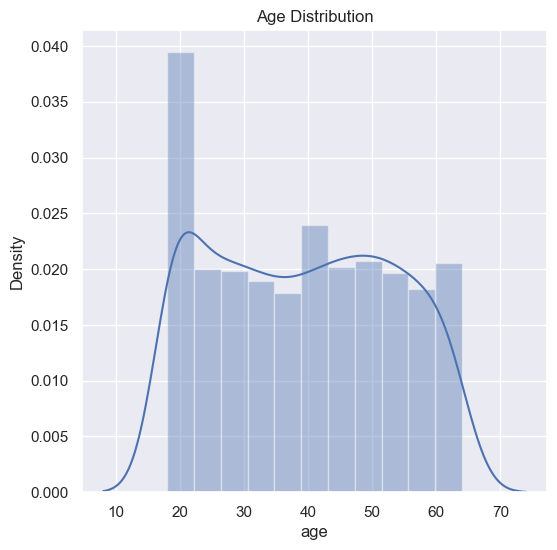

In [14]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset['age'])
plt.title('Age Distribution')
plt.show()

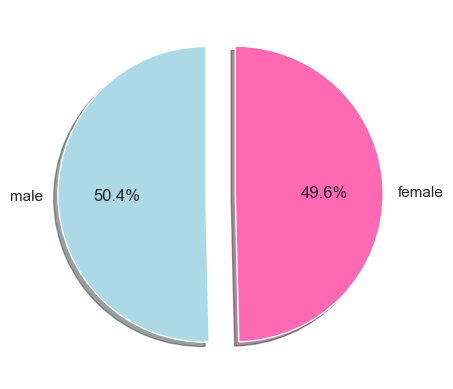

sex
male      669
female    659
Name: count, dtype: int64

In [15]:
sex_data_proportion = dataset['sex'].value_counts()

myexplode = [0.1, 0.1]
plt.pie(sex_data_proportion, labels=sex_data_proportion.index, autopct='%1.1f%%', startangle =90, explode= myexplode, shadow = True, colors=['lightblue','hotpink'])
plt.show()
dataset['sex'].value_counts()

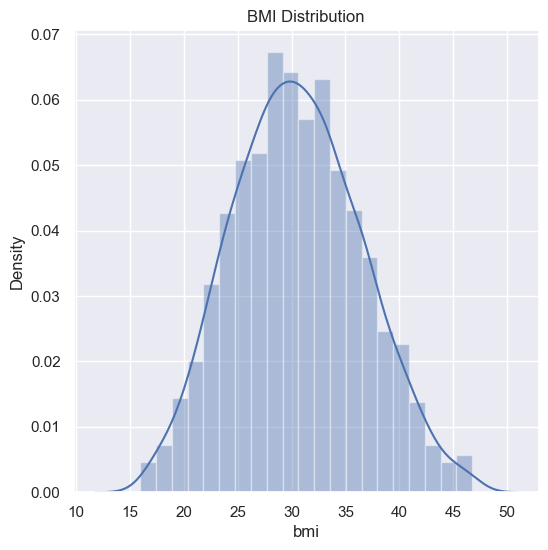

In [16]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

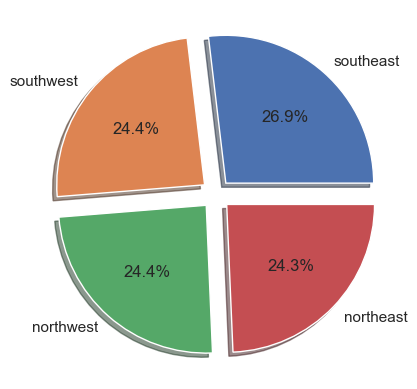

In [17]:
region_data_proportion = dataset['region'].value_counts()

myexplode = [0.1, 0.1, 0.1, 0.1]
plt.pie(region_data_proportion, labels=region_data_proportion.index, autopct='%1.1f%%', explode= myexplode,shadow = True)
plt.show()

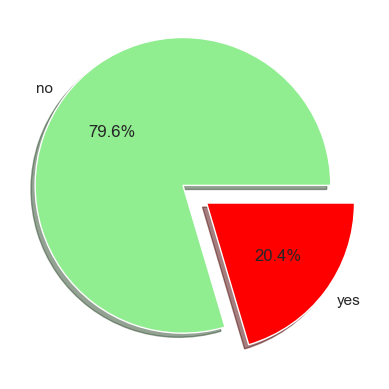

In [18]:
smoker_data_proportion = dataset['smoker'].value_counts()

myexplode = [0.1, 0.1]
plt.pie(smoker_data_proportion, labels=smoker_data_proportion.index, autopct='%1.1f%%', explode= myexplode,shadow = True, colors=['lightgreen','red'])
plt.show()

<Axes: xlabel='age', ylabel='Count'>

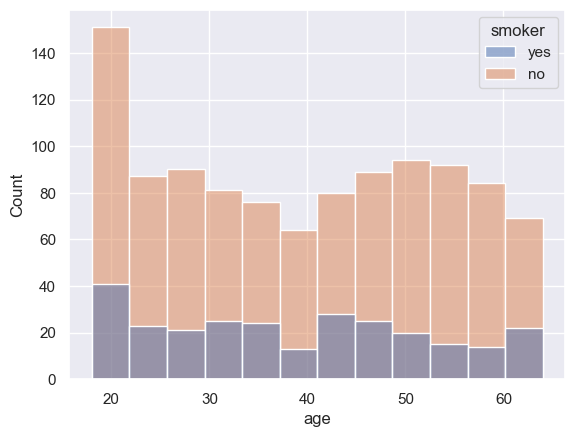

In [19]:
sns.histplot(x='age', hue='smoker',data=dataset)

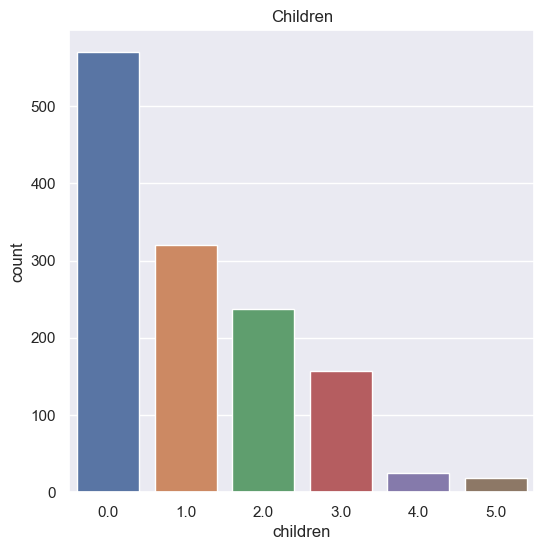

children
0.0    570
1.0    320
2.0    238
3.0    157
4.0     25
5.0     18
Name: count, dtype: int64

In [20]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=dataset)
plt.title('Children')
plt.show()

dataset['children'].value_counts()

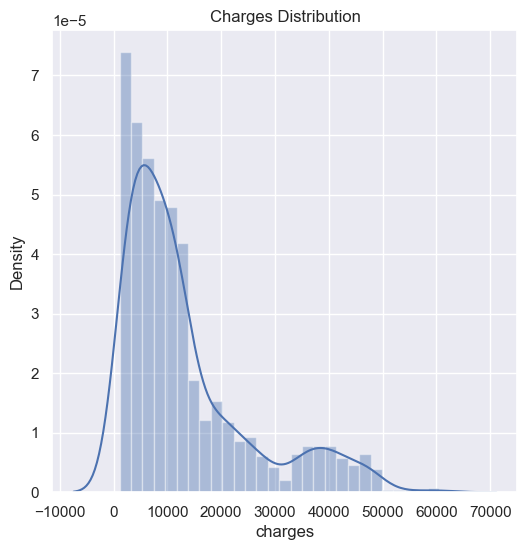

In [21]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Text(0.5, 1.0, 'Distribution of charges by age')

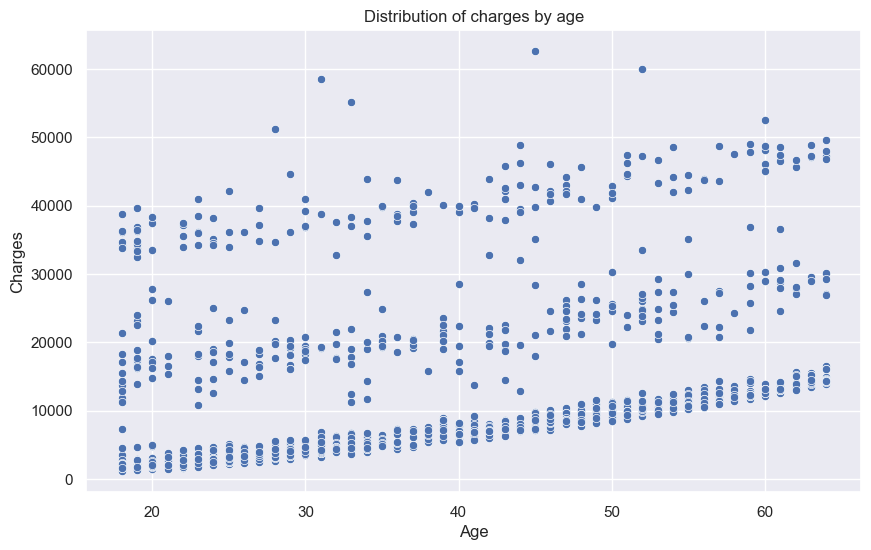

In [22]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "age", y = "charges", data = dataset)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age")

Text(0.5, 1.0, 'Distribution of charges by bmi')

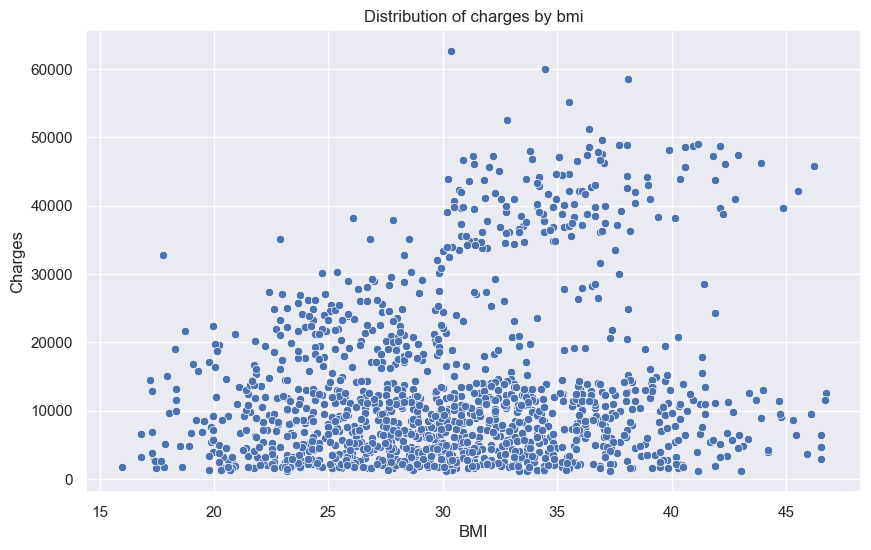

In [23]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "bmi", y = "charges", data = dataset)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Distribution of charges by bmi")

In [24]:
data=dataset.copy()

In [25]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()
data['sex'] = lb_encoder.fit_transform(data.sex)
data['smoker'] = lb_encoder.fit_transform(data.smoker)
data['region'] = lb_encoder.fit_transform(data.region)

In [26]:
data

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,1,3,16884.92400
1,18.0,1,33.770,1.0,0,2,1725.55230
2,28.0,1,33.000,3.0,0,2,4449.46200
3,33.0,1,22.705,0.0,0,1,21984.47061
4,32.0,1,28.880,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3.0,0,1,10600.54830
1334,18.0,0,31.920,0.0,0,0,2205.98080
1335,18.0,0,36.850,0.0,0,2,1629.83350
1336,21.0,0,25.800,0.0,0,3,2007.94500


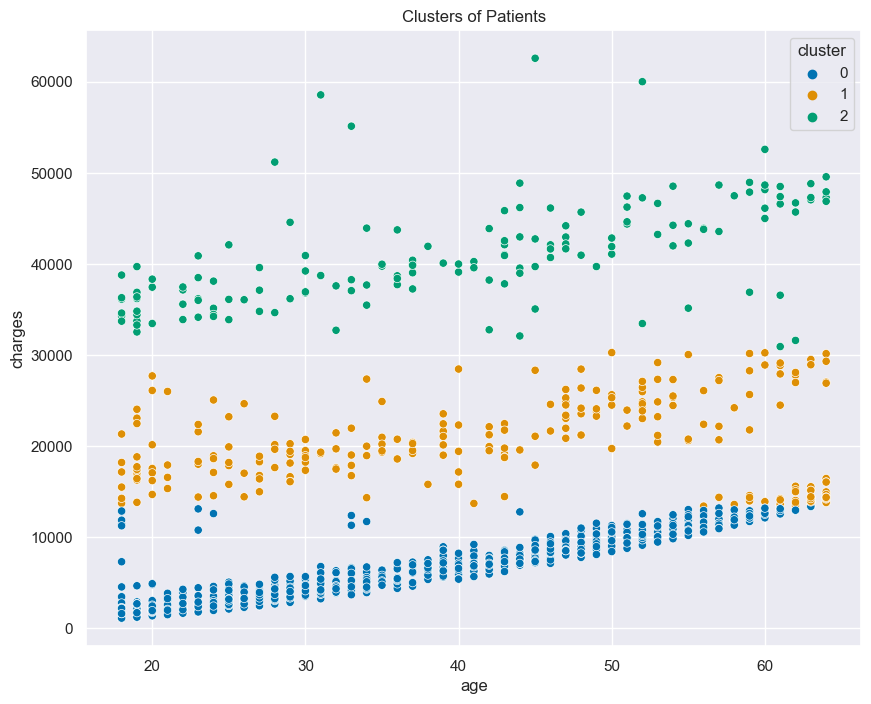

In [27]:
from sklearn.cluster import KMeans

rawk = data['charges']

X = np.array(rawk)
kmeans = KMeans(n_clusters=3,init=np.array([16000, 28000, 48000]).reshape(-1, 1))
kmeans = kmeans.fit(X.reshape(-1, 1))
data['cluster'] = kmeans.labels_

plt.figure(figsize = (10,8))
sns.scatterplot(data=data, x='age', y='charges', hue='cluster',palette='colorblind')
plt.title('Clusters of Patients')
plt.show()

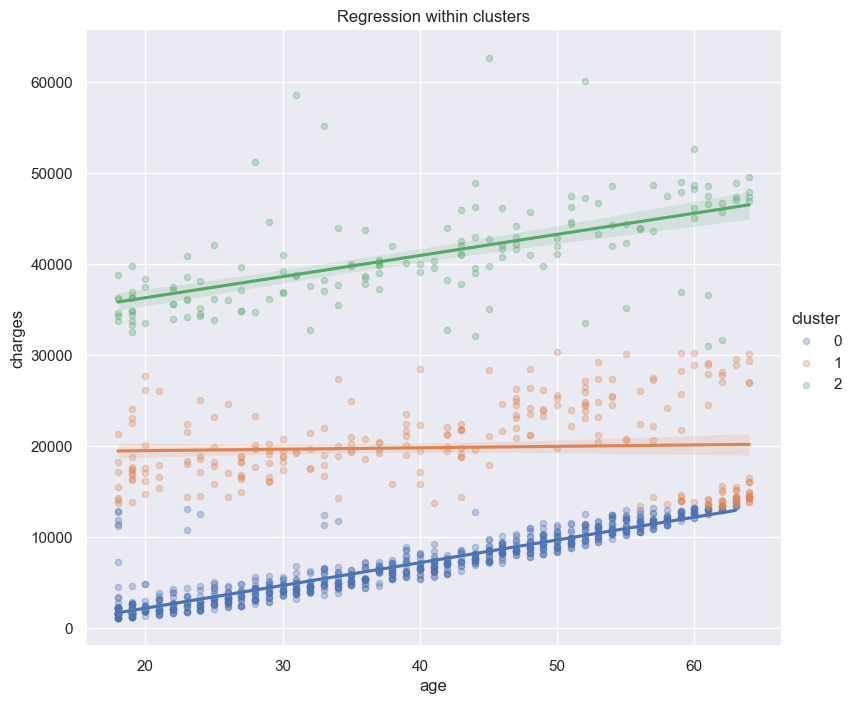

In [28]:
sns.lmplot(data=data, x='age', y='charges', hue='cluster', scatter_kws={"alpha": .3, 's': 20}, height=7, aspect=1.15)
plt.title('Regression within clusters')
plt.show()

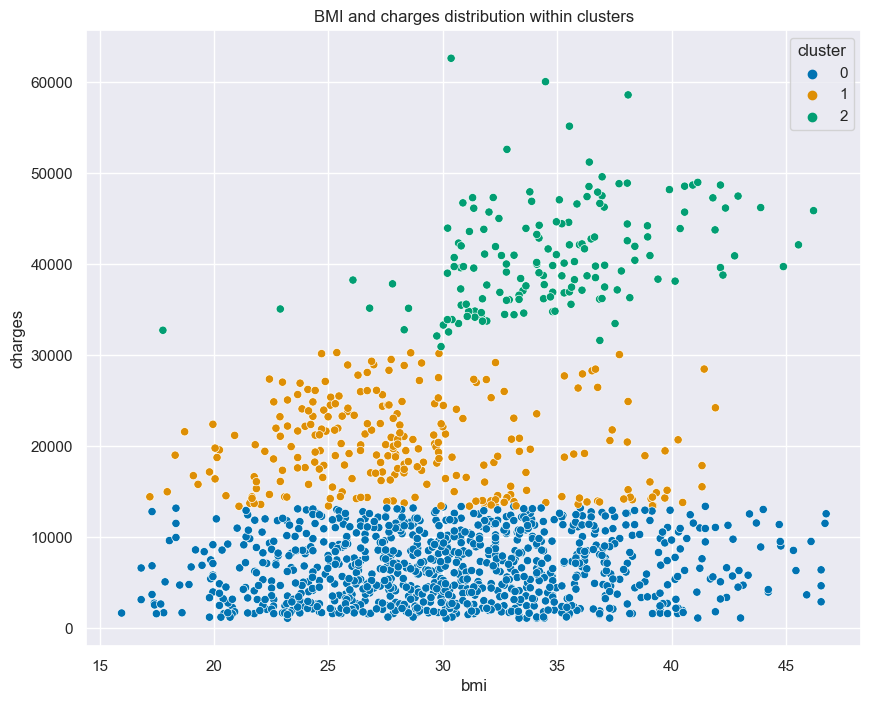

In [29]:
plt.figure(figsize = (10,8))
sns.scatterplot(data=data, x='bmi', y='charges', hue='cluster', palette='colorblind')
plt.title('BMI and charges distribution within clusters')
plt.show()

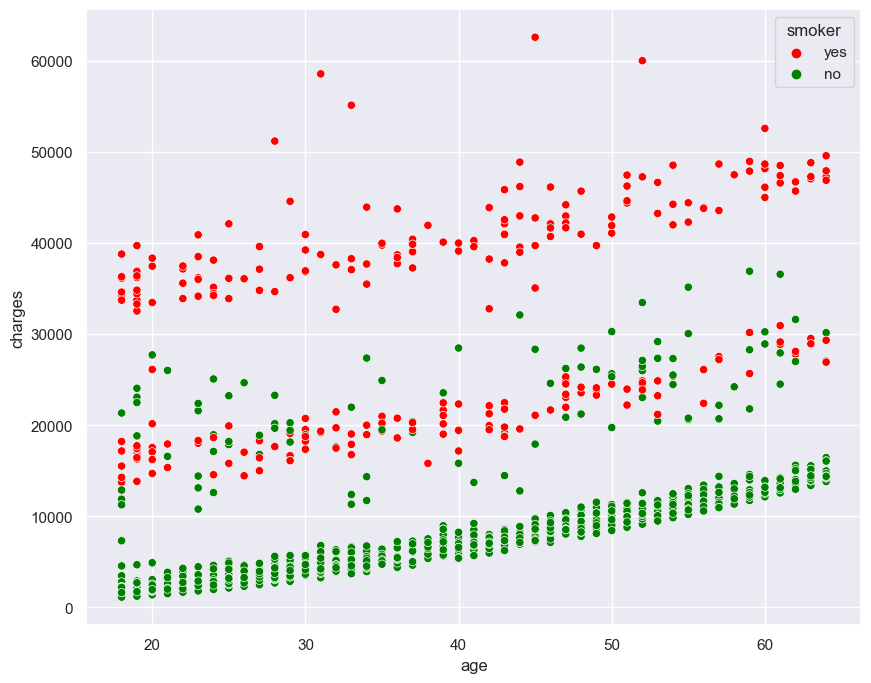

In [30]:
plt.figure(figsize = (10,8))
sns.scatterplot(data=dataset, x='age', y='charges', hue='smoker',palette=['red','green'])
plt.show()